In [1]:
# Import Dependencies
import math, time, random, datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, c


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


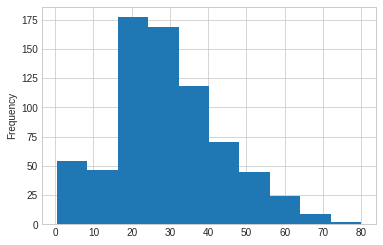

In [4]:
train.Age.plot.hist()

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


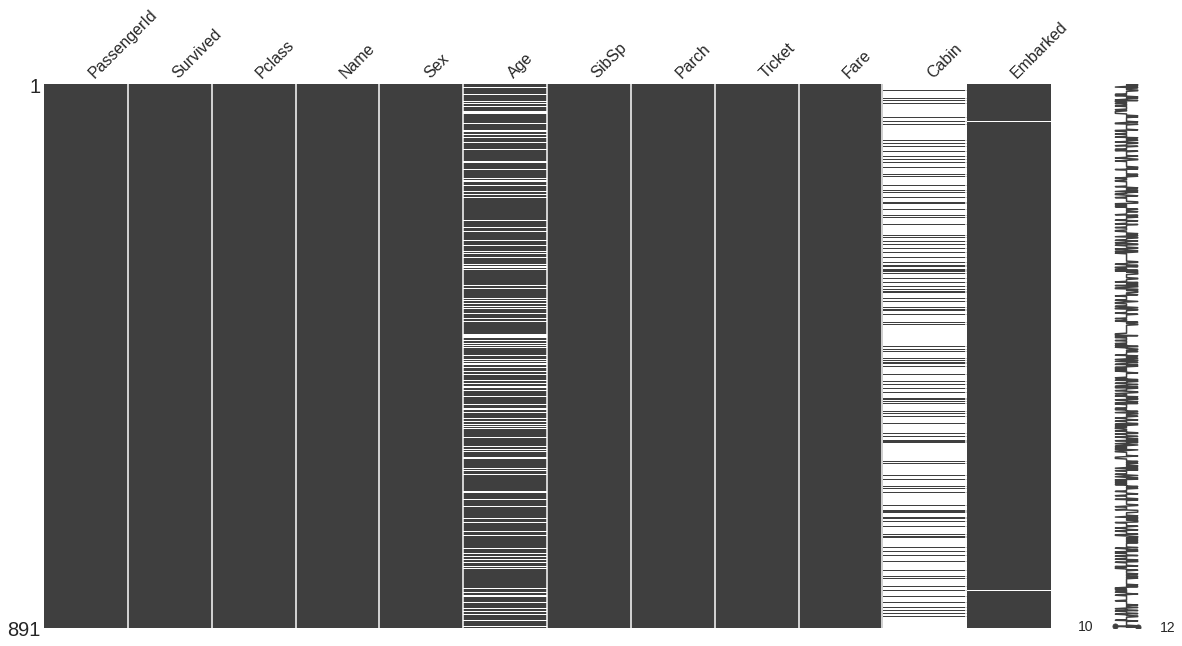

In [6]:
missingno.matrix(train, figsize =(20,10))

The white lines in the black matrix are the empty cells which need to be replaced or discarded before training the model on the data.
The actual number of values which are null can be found by the function below.

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The two data frames df_train and df_train_int are created because the Logistic regression model works on the integer values more efficuently. So the sex and other non inteeger values are converted to binary and stored separately as cat boos algorith word
ks on the categorical data.

In [8]:
df_train = pd.DataFrame()
df_train_int = pd.DataFrame()

In [9]:
print(train.dtypes)
train.head(15)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Features Classification

1. Go through each feature / coloumn and based on the number of missing values or in general the relation with survived members, decide wether or not to add in the training data frame.

2. Also convert non integer feilds into integer to store in df_train_int

0    549
1    342
Name: Survived, dtype: int64


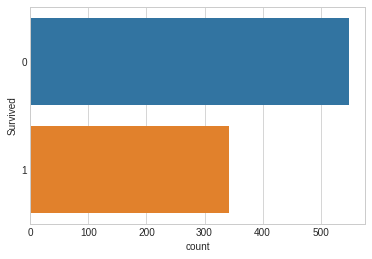

In [10]:
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts()) #counts the number of instances of unique values

In [11]:
#as survived is already binary, add it to both dataframes

df_train['Survived'] = train['Survived']
df_train_int['Survived'] = train['Survived']

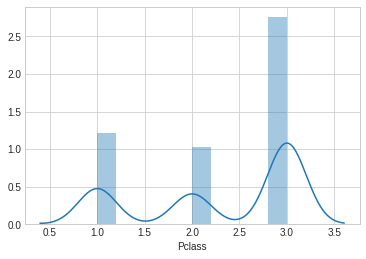

In [12]:
sns.distplot(train.Pclass)

In [13]:
#Pclass variable is also in integer, add to both data frames

df_train["Pclass"] = train['Pclass']
df_train_int['Pclass'] = train['Pclass']

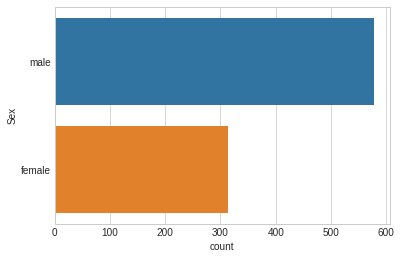

In [14]:
sns.countplot(y="Sex", data=train);

In [15]:
#convert sex to binary 1 and 0

df_train['Sex'] = train['Sex']

df_train_int['Sex'] = train['Sex']
df_train_int['Sex'] = np.where(df_train_int['Sex'] == "female", 1,0)

In [16]:
df_train.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [17]:
df_train_int.head()
df_train_int.dtypes

Survived    int64
Pclass      int64
Sex         int64
dtype: object

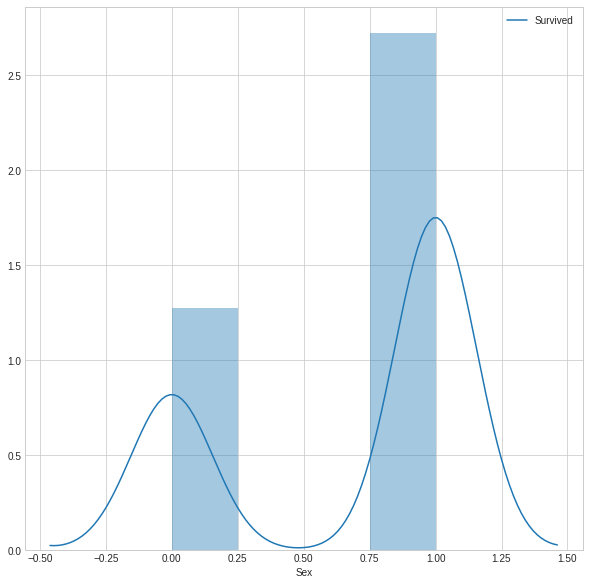

In [25]:
#getting an unknown error in just plotting the graph, the data frames are both correct.

fig = plt.figure(figsize=(10, 10))
sns.distplot(df_train_int.loc[df_train_int['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
#sns.distplot(df_train_int.loc[df_train_int['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})

In [26]:
train.Age.isnull().sum()

177

Function to plot the dist plot and bar plot side by side for better visualization.

In [27]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):

    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [29]:
train.SibSp.value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [37]:
df_train_int['SibSp'] = train['SibSp']
df_train['SibSp'] = train['SibSp']

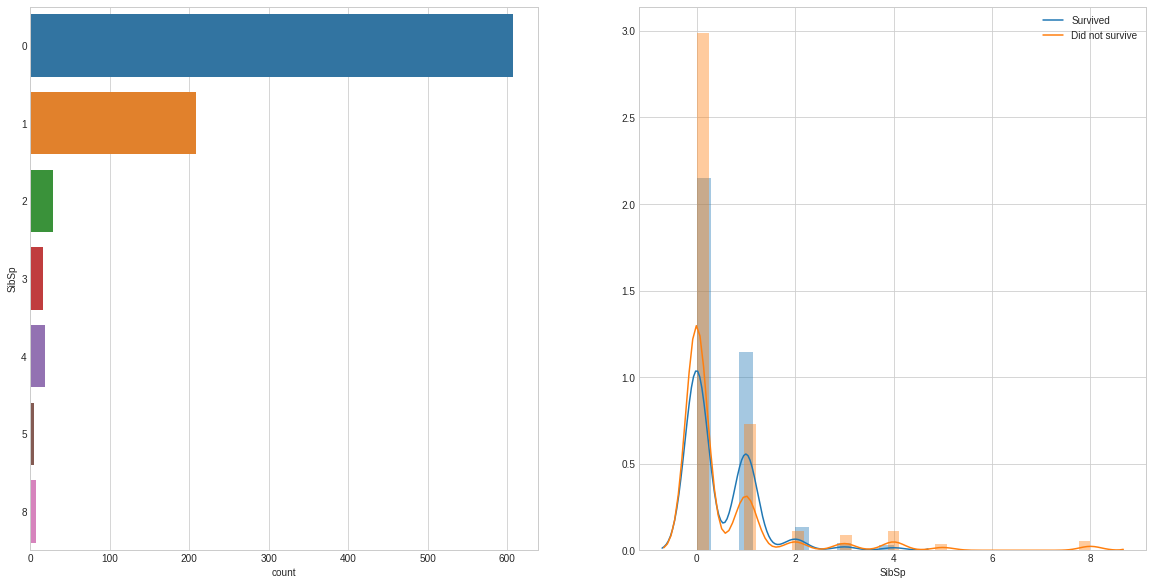

In [38]:
plot_count_dist(train, 
                bin_df=df_train_int, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [39]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [40]:

# Add Parch to subset dataframes
df_train_int['Parch'] = train['Parch']
df_train['Parch'] = train['Parch']

In [42]:
#same error as earlier in the plot, but no error in the data frame.

#plot_count_dist(train, 
#                bin_df=df_train_int,
#                label_column='Survived', 
#                target_column='Parch', 
#                figsize=(20, 10))

IndentationError: unexpected indent (<ipython-input-42-88dcfc192b53>, line 2)

In [44]:
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
3101295     6
           ..
12460       1
111427      1
349213      1
PC 17756    1
364512      1
Name: Ticket, Length: 681, dtype: int64

In [46]:
len(train.Fare.unique())

248

In [47]:
df_train['Fare'] = train['Fare'] 
df_train_int['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

S    644
C    168
Q     77
Name: Embarked, dtype: int64


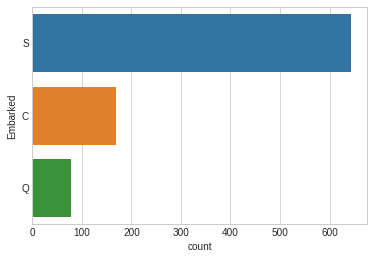

In [50]:
print(train.Embarked.value_counts())
sns.countplot(y='Embarked', data=train);

In [51]:
df_train['Embarked'] = train['Embarked']
df_train_int['Embarked'] = train['Embarked']

One hotting the coloumn is a process to divide every coloumn into binary data. Useful for regression models but not for cat boost that we are using.

In [56]:
one_hot_cols = df_train_int.columns.tolist()
one_hot_cols.remove('Survived')
df_train_int_enc = pd.get_dummies(df_train_int, columns=one_hot_cols)

df_train_int_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [57]:
df_embarked_one_hot = pd.get_dummies(df_train['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_train['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_train['Pclass'], 
                                   prefix='pclass')

In [59]:

# Combine the one hot encoded columns with df_con_enc
df_train_enc = pd.concat([df_train, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_train_enc = df_train_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

df_train_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


In [60]:
selected_df = df_train_enc

In [61]:
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [64]:
print(X_train.shape)
X_train

(891, 11)


,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,0,1,0,1,0,1,0
887,0,0,30.0000,0,0,1,1,0,1,0,0
888,1,2,23.4500,0,0,1,1,0,0,0,1
889,0,0,30.0000,1,0,0,0,1,1,0,0


# Function to fit the data set to an algorithm

In [65]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [66]:

# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.02
Accuracy CV 10-Fold: 79.46
Running Time: 0:00:02.086028


In [67]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.61
Accuracy CV 10-Fold: 76.88
Running Time: 0:00:00.197272


In [68]:

# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.48
Accuracy CV 10-Fold: 80.36
Running Time: 0:00:00.055784


In [69]:

# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.53
Accuracy CV 10-Fold: 81.14
Running Time: 0:00:00.368884


In [70]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [71]:

# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [73]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [74]:

# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6860715	total: 49.9ms	remaining: 49.8s
1:	learn: 0.6799993	total: 51.4ms	remaining: 25.6s
2:	learn: 0.6747330	total: 53.2ms	remaining: 17.7s
3:	learn: 0.6682239	total: 55.1ms	remaining: 13.7s
4:	learn: 0.6625344	total: 56.9ms	remaining: 11.3s
5:	learn: 0.6575493	total: 59ms	remaining: 9.77s
6:	learn: 0.6514394	total: 61.2ms	remaining: 8.68s
7:	learn: 0.6459279	total: 63.1ms	remaining: 7.82s
8:	learn: 0.6402582	total: 65.4ms	remaining: 7.2s
9:	learn: 0.6354880	total: 68.1ms	remaining: 6.74s
10:	learn: 0.6311730	total: 69.1ms	remaining: 6.21s
11:	learn: 0.6272315	total: 69.9ms	remaining: 5.76s
12:	learn: 0.6228373	total: 71.4ms	remaining: 5.42s
13:	learn: 0.6176238	total: 73.5ms	remaining: 5.18s
14:	learn: 0.6129054	total: 75ms	remaining: 4.93s
15:	learn: 0.6101549	total: 76.1ms	remaining: 4.68s
16:	learn: 0.6057291	total: 77.8ms	remaining: 4.5s
17:	learn: 0.6013946	total: 79.9ms	remaining: 4.36s
18:	learn: 0.5967908	total: 81.6ms	remaining: 4.21

219:	learn: 0.4100551	total: 385ms	remaining: 1.36s
220:	learn: 0.4099300	total: 386ms	remaining: 1.36s
221:	learn: 0.4096268	total: 387ms	remaining: 1.36s
222:	learn: 0.4092480	total: 389ms	remaining: 1.35s
223:	learn: 0.4090755	total: 391ms	remaining: 1.35s
224:	learn: 0.4087109	total: 392ms	remaining: 1.35s
225:	learn: 0.4085183	total: 394ms	remaining: 1.35s
226:	learn: 0.4083578	total: 395ms	remaining: 1.35s
227:	learn: 0.4079890	total: 398ms	remaining: 1.35s
228:	learn: 0.4077197	total: 400ms	remaining: 1.35s
229:	learn: 0.4076210	total: 403ms	remaining: 1.35s
230:	learn: 0.4074962	total: 405ms	remaining: 1.35s
231:	learn: 0.4074487	total: 406ms	remaining: 1.34s
232:	learn: 0.4072964	total: 408ms	remaining: 1.34s
233:	learn: 0.4069891	total: 409ms	remaining: 1.34s
234:	learn: 0.4068856	total: 410ms	remaining: 1.33s
235:	learn: 0.4067520	total: 411ms	remaining: 1.33s
236:	learn: 0.4066367	total: 413ms	remaining: 1.33s
237:	learn: 0.4063463	total: 415ms	remaining: 1.33s
238:	learn: 

529:	learn: 0.3775678	total: 764ms	remaining: 678ms
530:	learn: 0.3774638	total: 766ms	remaining: 677ms
531:	learn: 0.3774585	total: 767ms	remaining: 675ms
532:	learn: 0.3772978	total: 768ms	remaining: 673ms
533:	learn: 0.3772450	total: 770ms	remaining: 672ms
534:	learn: 0.3772152	total: 772ms	remaining: 671ms
535:	learn: 0.3772016	total: 774ms	remaining: 670ms
536:	learn: 0.3770616	total: 776ms	remaining: 669ms
537:	learn: 0.3770478	total: 777ms	remaining: 667ms
538:	learn: 0.3769870	total: 778ms	remaining: 666ms
539:	learn: 0.3768063	total: 780ms	remaining: 664ms
540:	learn: 0.3767256	total: 782ms	remaining: 663ms
541:	learn: 0.3764688	total: 784ms	remaining: 662ms
542:	learn: 0.3763625	total: 786ms	remaining: 662ms
543:	learn: 0.3762946	total: 788ms	remaining: 661ms
544:	learn: 0.3762147	total: 790ms	remaining: 659ms
545:	learn: 0.3761131	total: 791ms	remaining: 658ms
546:	learn: 0.3760597	total: 793ms	remaining: 656ms
547:	learn: 0.3760150	total: 794ms	remaining: 655ms
548:	learn: 

747:	learn: 0.3630320	total: 1.15s	remaining: 387ms
748:	learn: 0.3628149	total: 1.15s	remaining: 385ms
749:	learn: 0.3627684	total: 1.15s	remaining: 384ms
750:	learn: 0.3627363	total: 1.15s	remaining: 382ms
751:	learn: 0.3626894	total: 1.15s	remaining: 381ms
752:	learn: 0.3626745	total: 1.16s	remaining: 379ms
753:	learn: 0.3625809	total: 1.16s	remaining: 378ms
754:	learn: 0.3625133	total: 1.16s	remaining: 377ms
755:	learn: 0.3624078	total: 1.16s	remaining: 375ms
756:	learn: 0.3623210	total: 1.16s	remaining: 374ms
757:	learn: 0.3621983	total: 1.17s	remaining: 373ms
758:	learn: 0.3621730	total: 1.17s	remaining: 371ms
759:	learn: 0.3620994	total: 1.17s	remaining: 370ms
760:	learn: 0.3620382	total: 1.17s	remaining: 368ms
761:	learn: 0.3620203	total: 1.17s	remaining: 367ms
762:	learn: 0.3618265	total: 1.18s	remaining: 365ms
763:	learn: 0.3618042	total: 1.18s	remaining: 363ms
764:	learn: 0.3617782	total: 1.18s	remaining: 362ms
765:	learn: 0.3616176	total: 1.18s	remaining: 360ms
766:	learn: 

In [75]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6730069	test: 0.6737752	best: 0.6737752 (0)	total: 5.39s	remaining: 1h 29m 40s
1:	learn: 0.6558336	test: 0.6574866	best: 0.6574866 (1)	total: 9.7s	remaining: 1h 20m 38s
2:	learn: 0.6388933	test: 0.6418812	best: 0.6418812 (2)	total: 13.3s	remaining: 1h 13m 31s
3:	learn: 0.6249397	test: 0.6282674	best: 0.6282674 (3)	total: 17.5s	remaining: 1h 12m 49s
4:	learn: 0.6103083	test: 0.6148184	best: 0.6148184 (4)	total: 21.5s	remaining: 1h 11m 19s
5:	learn: 0.5974957	test: 0.6024995	best: 0.6024995 (5)	total: 25.8s	remaining: 1h 11m 10s
6:	learn: 0.5874060	test: 0.5926763	best: 0.5926763 (6)	total: 30.2s	remaining: 1h 11m 28s
7:	learn: 0.5781083	test: 0.5840767	best: 0.5840767 (7)	total: 36.1s	remaining: 1h 14m 34s
8:	learn: 0.5677570	test: 0.5742979	best: 0.5742979 (8)	total: 40.5s	remaining: 1h 14m 18s
9:	learn: 0.5591193	test: 0.5666276	best: 0.5666276 (9)	total: 44.1s	remaining: 1h 12m 48s
10:	learn: 0.5508540	test: 0.5588917	best: 0.5588917 (10)	total: 48.4s	remaining: 1h 12m 33

88:	learn: 0.3955708	test: 0.4449069	best: 0.4449069 (88)	total: 6m 56s	remaining: 1h 11m 5s
89:	learn: 0.3952294	test: 0.4447220	best: 0.4447220 (89)	total: 7m	remaining: 1h 10m 54s
90:	learn: 0.3948031	test: 0.4447702	best: 0.4447220 (89)	total: 7m 4s	remaining: 1h 10m 41s
91:	learn: 0.3943452	test: 0.4446652	best: 0.4446652 (91)	total: 7m 10s	remaining: 1h 10m 53s
92:	learn: 0.3940293	test: 0.4446360	best: 0.4446360 (92)	total: 7m 14s	remaining: 1h 10m 40s
93:	learn: 0.3934512	test: 0.4446197	best: 0.4446197 (93)	total: 7m 19s	remaining: 1h 10m 33s
94:	learn: 0.3929167	test: 0.4444671	best: 0.4444671 (94)	total: 7m 22s	remaining: 1h 10m 16s
95:	learn: 0.3927050	test: 0.4444460	best: 0.4444460 (95)	total: 7m 27s	remaining: 1h 10m 12s
96:	learn: 0.3922089	test: 0.4441354	best: 0.4441354 (96)	total: 7m 31s	remaining: 1h 10m 4s
97:	learn: 0.3916650	test: 0.4439580	best: 0.4439580 (97)	total: 7m 36s	remaining: 1h 9m 59s
98:	learn: 0.3912705	test: 0.4439865	best: 0.4439580 (97)	total: 7m 

175:	learn: 0.3686139	test: 0.4431465	best: 0.4427808 (154)	total: 13m 37s	remaining: 1h 3m 47s
176:	learn: 0.3684022	test: 0.4431216	best: 0.4427808 (154)	total: 13m 40s	remaining: 1h 3m 36s
177:	learn: 0.3680626	test: 0.4431700	best: 0.4427808 (154)	total: 13m 45s	remaining: 1h 3m 29s
178:	learn: 0.3677071	test: 0.4432153	best: 0.4427808 (154)	total: 13m 49s	remaining: 1h 3m 23s
179:	learn: 0.3674208	test: 0.4432730	best: 0.4427808 (154)	total: 13m 53s	remaining: 1h 3m 15s
180:	learn: 0.3671289	test: 0.4433690	best: 0.4427808 (154)	total: 13m 57s	remaining: 1h 3m 9s
181:	learn: 0.3669088	test: 0.4433261	best: 0.4427808 (154)	total: 14m 3s	remaining: 1h 3m 10s
182:	learn: 0.3667884	test: 0.4433279	best: 0.4427808 (154)	total: 14m 7s	remaining: 1h 3m 2s
183:	learn: 0.3665864	test: 0.4433006	best: 0.4427808 (154)	total: 14m 11s	remaining: 1h 2m 56s
184:	learn: 0.3663661	test: 0.4433061	best: 0.4427808 (154)	total: 14m 15s	remaining: 1h 2m 50s
185:	learn: 0.3662477	test: 0.4433184	best: 

263:	learn: 0.3481452	test: 0.4453018	best: 0.4427808 (154)	total: 20m 49s	remaining: 58m 2s
264:	learn: 0.3480051	test: 0.4452514	best: 0.4427808 (154)	total: 20m 58s	remaining: 58m 10s
265:	learn: 0.3477947	test: 0.4451872	best: 0.4427808 (154)	total: 21m 2s	remaining: 58m 4s
266:	learn: 0.3474986	test: 0.4451724	best: 0.4427808 (154)	total: 21m 10s	remaining: 58m 7s
267:	learn: 0.3472559	test: 0.4450308	best: 0.4427808 (154)	total: 21m 14s	remaining: 58m 1s
268:	learn: 0.3470317	test: 0.4450261	best: 0.4427808 (154)	total: 21m 19s	remaining: 57m 56s
269:	learn: 0.3468173	test: 0.4451341	best: 0.4427808 (154)	total: 21m 25s	remaining: 57m 56s
270:	learn: 0.3466214	test: 0.4450981	best: 0.4427808 (154)	total: 21m 35s	remaining: 58m 6s
271:	learn: 0.3463731	test: 0.4449874	best: 0.4427808 (154)	total: 21m 41s	remaining: 58m 2s
272:	learn: 0.3460986	test: 0.4450423	best: 0.4427808 (154)	total: 21m 44s	remaining: 57m 54s
273:	learn: 0.3459754	test: 0.4450730	best: 0.4427808 (154)	total: 

351:	learn: 0.3257800	test: 0.4452410	best: 0.4427808 (154)	total: 28m 3s	remaining: 51m 39s
352:	learn: 0.3254391	test: 0.4451987	best: 0.4427808 (154)	total: 28m 8s	remaining: 51m 35s
353:	learn: 0.3250880	test: 0.4451004	best: 0.4427808 (154)	total: 28m 16s	remaining: 51m 35s
354:	learn: 0.3248623	test: 0.4450581	best: 0.4427808 (154)	total: 28m 21s	remaining: 51m 30s
355:	learn: 0.3246292	test: 0.4449961	best: 0.4427808 (154)	total: 28m 26s	remaining: 51m 27s
356:	learn: 0.3243518	test: 0.4448264	best: 0.4427808 (154)	total: 28m 31s	remaining: 51m 22s
357:	learn: 0.3241128	test: 0.4447611	best: 0.4427808 (154)	total: 28m 36s	remaining: 51m 18s
358:	learn: 0.3238792	test: 0.4446976	best: 0.4427808 (154)	total: 28m 40s	remaining: 51m 11s
359:	learn: 0.3235577	test: 0.4448510	best: 0.4427808 (154)	total: 28m 44s	remaining: 51m 6s
360:	learn: 0.3232706	test: 0.4447973	best: 0.4427808 (154)	total: 28m 48s	remaining: 50m 59s
361:	learn: 0.3229951	test: 0.4447278	best: 0.4427808 (154)	tot

439:	learn: 0.3043441	test: 0.4466476	best: 0.4427808 (154)	total: 34m 53s	remaining: 44m 24s
440:	learn: 0.3041430	test: 0.4466712	best: 0.4427808 (154)	total: 34m 57s	remaining: 44m 19s
441:	learn: 0.3040036	test: 0.4466407	best: 0.4427808 (154)	total: 35m 2s	remaining: 44m 14s
442:	learn: 0.3038044	test: 0.4467605	best: 0.4427808 (154)	total: 35m 6s	remaining: 44m 8s
443:	learn: 0.3035132	test: 0.4467184	best: 0.4427808 (154)	total: 35m 11s	remaining: 44m 3s
444:	learn: 0.3032927	test: 0.4468699	best: 0.4427808 (154)	total: 35m 14s	remaining: 43m 57s
445:	learn: 0.3030556	test: 0.4467182	best: 0.4427808 (154)	total: 35m 19s	remaining: 43m 52s
446:	learn: 0.3028241	test: 0.4467397	best: 0.4427808 (154)	total: 35m 23s	remaining: 43m 46s
447:	learn: 0.3026506	test: 0.4466708	best: 0.4427808 (154)	total: 35m 28s	remaining: 43m 42s
448:	learn: 0.3024686	test: 0.4466273	best: 0.4427808 (154)	total: 35m 32s	remaining: 43m 37s
449:	learn: 0.3022526	test: 0.4467320	best: 0.4427808 (154)	tota

527:	learn: 0.2872062	test: 0.4472908	best: 0.4427808 (154)	total: 41m 29s	remaining: 37m 5s
528:	learn: 0.2870245	test: 0.4474210	best: 0.4427808 (154)	total: 41m 33s	remaining: 36m 59s
529:	learn: 0.2868152	test: 0.4475621	best: 0.4427808 (154)	total: 41m 39s	remaining: 36m 56s
530:	learn: 0.2866384	test: 0.4474384	best: 0.4427808 (154)	total: 41m 43s	remaining: 36m 51s
531:	learn: 0.2864519	test: 0.4475551	best: 0.4427808 (154)	total: 41m 49s	remaining: 36m 47s
532:	learn: 0.2862897	test: 0.4476630	best: 0.4427808 (154)	total: 41m 54s	remaining: 36m 43s
533:	learn: 0.2861165	test: 0.4477127	best: 0.4427808 (154)	total: 41m 58s	remaining: 36m 38s
534:	learn: 0.2859614	test: 0.4477662	best: 0.4427808 (154)	total: 42m 3s	remaining: 36m 33s
535:	learn: 0.2857513	test: 0.4478634	best: 0.4427808 (154)	total: 42m 7s	remaining: 36m 27s
536:	learn: 0.2856191	test: 0.4478789	best: 0.4427808 (154)	total: 42m 13s	remaining: 36m 24s
537:	learn: 0.2854313	test: 0.4479645	best: 0.4427808 (154)	tot

615:	learn: 0.2728914	test: 0.4495092	best: 0.4427808 (154)	total: 48m 18s	remaining: 30m 6s
616:	learn: 0.2727431	test: 0.4495919	best: 0.4427808 (154)	total: 48m 22s	remaining: 30m 2s
617:	learn: 0.2725442	test: 0.4495765	best: 0.4427808 (154)	total: 48m 27s	remaining: 29m 57s
618:	learn: 0.2724102	test: 0.4496643	best: 0.4427808 (154)	total: 48m 31s	remaining: 29m 52s
619:	learn: 0.2722687	test: 0.4496814	best: 0.4427808 (154)	total: 48m 36s	remaining: 29m 47s
620:	learn: 0.2721048	test: 0.4497315	best: 0.4427808 (154)	total: 48m 41s	remaining: 29m 42s
621:	learn: 0.2719891	test: 0.4498017	best: 0.4427808 (154)	total: 48m 45s	remaining: 29m 38s
622:	learn: 0.2718761	test: 0.4497468	best: 0.4427808 (154)	total: 48m 49s	remaining: 29m 33s
623:	learn: 0.2717508	test: 0.4497271	best: 0.4427808 (154)	total: 48m 53s	remaining: 29m 27s
624:	learn: 0.2715244	test: 0.4496465	best: 0.4427808 (154)	total: 48m 58s	remaining: 29m 23s
625:	learn: 0.2713657	test: 0.4496420	best: 0.4427808 (154)	to

703:	learn: 0.2598007	test: 0.4513543	best: 0.4427808 (154)	total: 55m 9s	remaining: 23m 11s
704:	learn: 0.2596938	test: 0.4514643	best: 0.4427808 (154)	total: 55m 13s	remaining: 23m 6s
705:	learn: 0.2595572	test: 0.4515321	best: 0.4427808 (154)	total: 55m 19s	remaining: 23m 2s
706:	learn: 0.2594482	test: 0.4515363	best: 0.4427808 (154)	total: 55m 23s	remaining: 22m 57s
707:	learn: 0.2593151	test: 0.4515613	best: 0.4427808 (154)	total: 55m 27s	remaining: 22m 52s
708:	learn: 0.2592114	test: 0.4517814	best: 0.4427808 (154)	total: 55m 31s	remaining: 22m 47s
709:	learn: 0.2590316	test: 0.4517869	best: 0.4427808 (154)	total: 55m 35s	remaining: 22m 42s
710:	learn: 0.2589339	test: 0.4518487	best: 0.4427808 (154)	total: 55m 39s	remaining: 22m 37s
711:	learn: 0.2588062	test: 0.4518420	best: 0.4427808 (154)	total: 55m 45s	remaining: 22m 33s
712:	learn: 0.2586602	test: 0.4518543	best: 0.4427808 (154)	total: 55m 50s	remaining: 22m 28s
713:	learn: 0.2585038	test: 0.4519226	best: 0.4427808 (154)	tot

791:	learn: 0.2484379	test: 0.4531955	best: 0.4427808 (154)	total: 1h 2m 1s	remaining: 16m 17s
792:	learn: 0.2482952	test: 0.4531593	best: 0.4427808 (154)	total: 1h 2m 8s	remaining: 16m 13s
793:	learn: 0.2481587	test: 0.4532340	best: 0.4427808 (154)	total: 1h 2m 12s	remaining: 16m 8s
794:	learn: 0.2480310	test: 0.4533750	best: 0.4427808 (154)	total: 1h 2m 17s	remaining: 16m 3s
795:	learn: 0.2479107	test: 0.4532980	best: 0.4427808 (154)	total: 1h 2m 21s	remaining: 15m 58s
796:	learn: 0.2478037	test: 0.4533306	best: 0.4427808 (154)	total: 1h 2m 25s	remaining: 15m 53s
797:	learn: 0.2476804	test: 0.4534009	best: 0.4427808 (154)	total: 1h 2m 29s	remaining: 15m 49s
798:	learn: 0.2475427	test: 0.4534173	best: 0.4427808 (154)	total: 1h 2m 34s	remaining: 15m 44s
799:	learn: 0.2474261	test: 0.4533556	best: 0.4427808 (154)	total: 1h 2m 39s	remaining: 15m 39s
800:	learn: 0.2472667	test: 0.4533157	best: 0.4427808 (154)	total: 1h 2m 44s	remaining: 15m 35s
801:	learn: 0.2471588	test: 0.4532934	best: 

877:	learn: 0.2384249	test: 0.4542326	best: 0.4427808 (154)	total: 1h 8m 37s	remaining: 9m 32s
878:	learn: 0.2382893	test: 0.4542575	best: 0.4427808 (154)	total: 1h 8m 42s	remaining: 9m 27s
879:	learn: 0.2381870	test: 0.4544434	best: 0.4427808 (154)	total: 1h 8m 47s	remaining: 9m 22s
880:	learn: 0.2380735	test: 0.4545049	best: 0.4427808 (154)	total: 1h 8m 51s	remaining: 9m 18s
881:	learn: 0.2379865	test: 0.4545243	best: 0.4427808 (154)	total: 1h 8m 58s	remaining: 9m 13s
882:	learn: 0.2378002	test: 0.4545695	best: 0.4427808 (154)	total: 1h 9m 2s	remaining: 9m 8s
883:	learn: 0.2377057	test: 0.4546334	best: 0.4427808 (154)	total: 1h 9m 7s	remaining: 9m 4s
884:	learn: 0.2375880	test: 0.4546374	best: 0.4427808 (154)	total: 1h 9m 11s	remaining: 8m 59s
885:	learn: 0.2374713	test: 0.4547252	best: 0.4427808 (154)	total: 1h 9m 16s	remaining: 8m 54s
886:	learn: 0.2373685	test: 0.4547093	best: 0.4427808 (154)	total: 1h 9m 21s	remaining: 8m 50s
887:	learn: 0.2372826	test: 0.4548429	best: 0.4427808 

963:	learn: 0.2293340	test: 0.4559618	best: 0.4427808 (154)	total: 1h 15m 15s	remaining: 2m 48s
964:	learn: 0.2292336	test: 0.4560633	best: 0.4427808 (154)	total: 1h 15m 20s	remaining: 2m 43s
965:	learn: 0.2291198	test: 0.4560666	best: 0.4427808 (154)	total: 1h 15m 26s	remaining: 2m 39s
966:	learn: 0.2290258	test: 0.4560710	best: 0.4427808 (154)	total: 1h 15m 31s	remaining: 2m 34s
967:	learn: 0.2289074	test: 0.4560041	best: 0.4427808 (154)	total: 1h 15m 35s	remaining: 2m 29s
968:	learn: 0.2288146	test: 0.4560900	best: 0.4427808 (154)	total: 1h 15m 39s	remaining: 2m 25s
969:	learn: 0.2286936	test: 0.4560684	best: 0.4427808 (154)	total: 1h 15m 43s	remaining: 2m 20s
970:	learn: 0.2285618	test: 0.4561043	best: 0.4427808 (154)	total: 1h 15m 47s	remaining: 2m 15s
971:	learn: 0.2284584	test: 0.4562081	best: 0.4427808 (154)	total: 1h 15m 51s	remaining: 2m 11s
972:	learn: 0.2283745	test: 0.4561851	best: 0.4427808 (154)	total: 1h 15m 57s	remaining: 2m 6s
973:	learn: 0.2282587	test: 0.4561461	bes

In [76]:
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 84.51
Accuracy cross-validation 10-Fold: 80.92
Running Time: 1:18:01.533323


In [77]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
4,1.017000,embarked_Q
3,1.021591,embarked_C
5,1.709158,embarked_S
9,2.021072,pclass_2
8,3.513907,pclass_1
0,10.434458,SibSp
10,10.721392,pclass_3
1,12.753059,Parch
2,15.398787,Fare
7,18.522501,sex_male


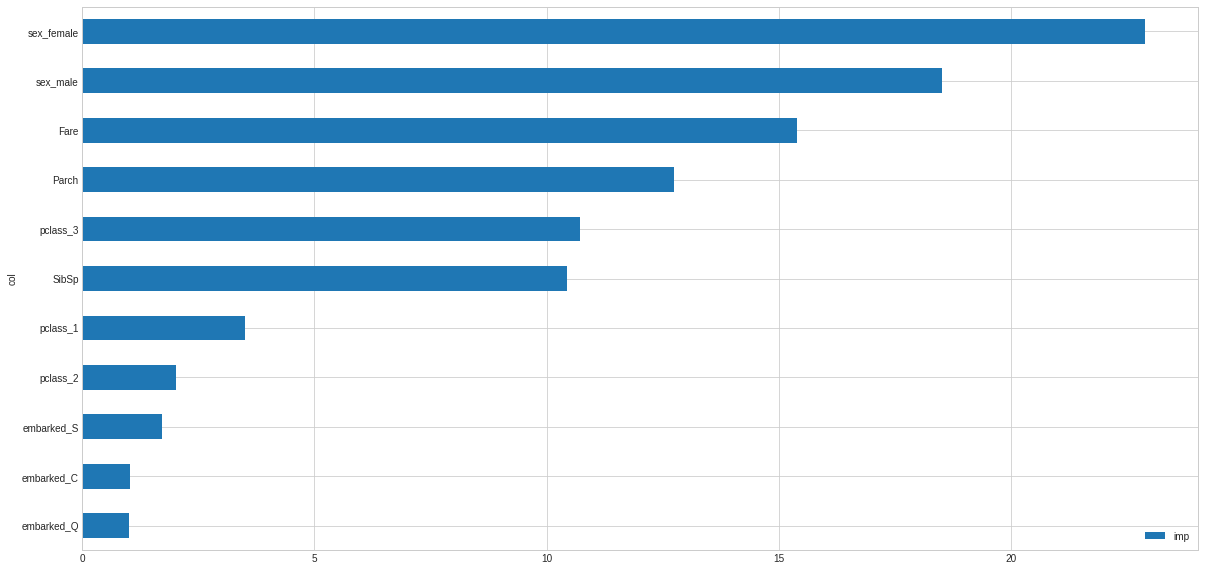

In [78]:
feature_importance(catboost_model, X_train)

In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [81]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [82]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [83]:
wanted_test_columns = X_train.columns
wanted_test_columns


Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [84]:
predictions = catboost_model.predict(test[wanted_test_columns])


In [85]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [86]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [87]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [88]:
len(submission)

418

In [89]:
submission.to_csv('catboost_submission.csv', index=False)

# Scope for future improvement

1. Compute a way to involve Age, Ticket and Cabin into the training data set for increasing the accuracy
2. If possible use the prefix from the name such as Mr. Mrs. Ms. Master. Dr. and give them labels and nvolve it in the training data set.
3. Scope out the errors in the plots that are occuring in two of the above plots without there being an error in the data frame.

